In [23]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

def func(x):
    return 0.2*x+3

#генерируем семплы для обучения (сами данные)
def gen_samples(total, step):
    x = 0
    while x < total*step:
        yield func(x) + np.random.uniform(-1,1)*np.random.uniform(2,8)
        x += step

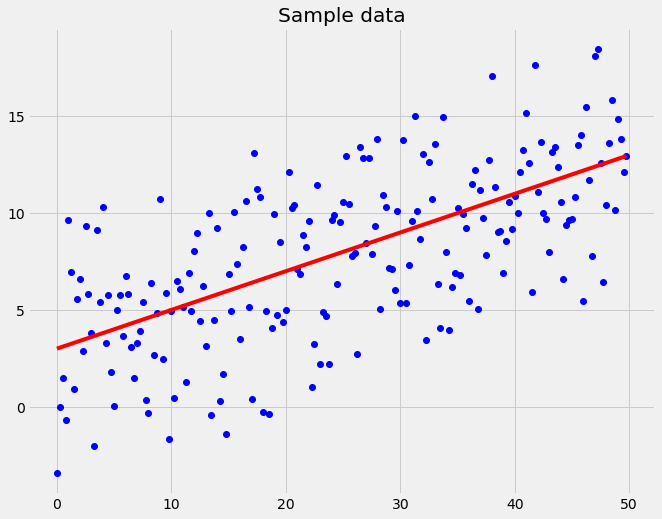

In [24]:
total = 200
step = 0.25

X = np.arange(0,total * step, step) #генерируем X
Y = np.array([y for y in gen_samples(total,step)])
Y_func = np.array([y for y in func(X)])

plt.figure(figsize = (10,8))
plt.plot(X,Y, 'bo')
plt.plot(X, Y_func, 'r')
plt.title('Sample data');

In [39]:
X = (X - X.min()) / (X.max() - X.min()) #нормализация

A = np.empty((total,2))
A[:, 0] = 1
A[:, 1] = X
weights = [10,15] #инизиализируем веса
weights = np.array(weights.copy(), dtype = np.float32)

def error_func(A,Y,W):
    return (Y - np.dot(A,W)).T.dot(Y - np.dot(A,W))

#def error_func(A, Y, W):
#    return (Y - A@W).T@(Y-A@W)

error_func(A,Y,weights)

21667.63392372853

In [16]:
def batch_gd(A,Y, speed = 0.0001):
    W = np.array(weights.copy(), dtype = np.float32)
    W.reshape((len(W),1))
    previous_error = 10**6 #большое число для первого прохода циклом
    current_error = error_func(A,Y,W)
    #пока не сойдется
    while np.abs(previous_error - current_error) > eps:
        previous_error = current_error
        derivatives = [0] * len(W)
        #===========================================
        for p in range(len(W)): #для каждого из параметров/весов
            m = 0
            for n in range(len(Y)): #для всех семплов
                m += (Y[n] - np.dot(A[n],W))*A[n][p] #определяем градиент
            derivatives[p] = m
        #обновляем веса для обоих параметров
        W[0] += speed*derivatives[0]
        W[1] += speed*derivatives[1]
        #===========================================
        current_error = error_func(A,Y,W)
        plt.plot(W[0], W[1], 'ro')
    return W

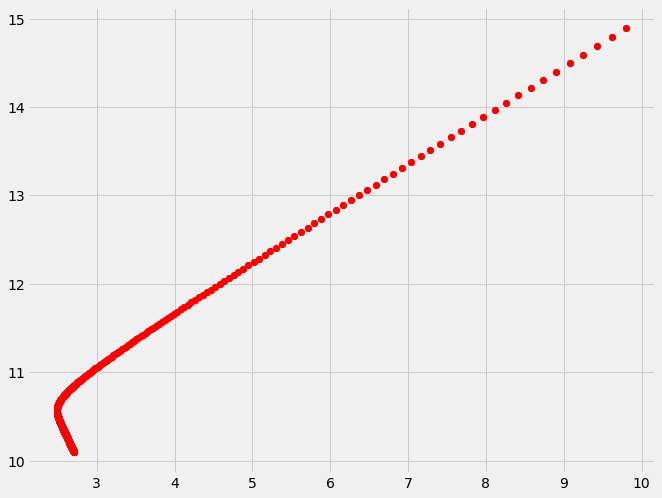

In [40]:
plt.figure(figsize = (10,8))

eps = 0.01
batch_gd(A,Y)
W = batch_gd(A,Y)

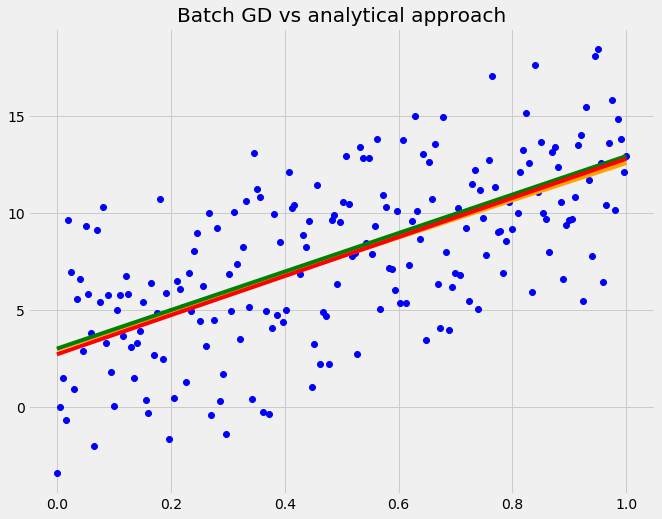

In [41]:
plt.figure(figsize = (10,8))


#аналитическое решение
an_W = np.linalg.pinv(A).dot(Y)

Y_pred = A.dot(an_W)
Y_gd = A.dot(W)

plt.plot(X,Y, 'bo')
plt.plot(X,Y_pred, 'orange')
plt.plot(X,Y_func, 'g')
plt.plot(X,Y_gd, 'r')
plt.title('Batch GD vs analytical approach');

In [42]:
W, an_W

(array([ 2.7074676, 10.097741 ], dtype=float32),
 array([2.95856339, 9.62889101]))

In [44]:
def stohastic_gd(A,Y, speed = 0.01):
    W = np.array(weights.copy(), dtype = np.float32)
    W.reshape((len(W),1))
    
    previous_error = 10**6 #большое число для первого прохода циклом
    current_error = error_func(A,Y,W)
    #пока не сойдется
    while np.abs(previous_error - current_error) > eps:
        previous_error = current_error   
        n = np.random.randint(0,len(Y)) #выбираем случайный семпл
        derivatives = [0] * len(W)
        for p in range(len(W)): #для каждого из параметров/весов
                derivatives[p] += (Y[n] - np.dot(A[n],W))*A[n][p] #определяем градиент
        W[0] += speed*derivatives[0]
        W[1] += speed*derivatives[1]
                #===========================================
        current_error = error_func(A,Y,W)
        plt.plot(W[0], W[1], 'ro')
    return W

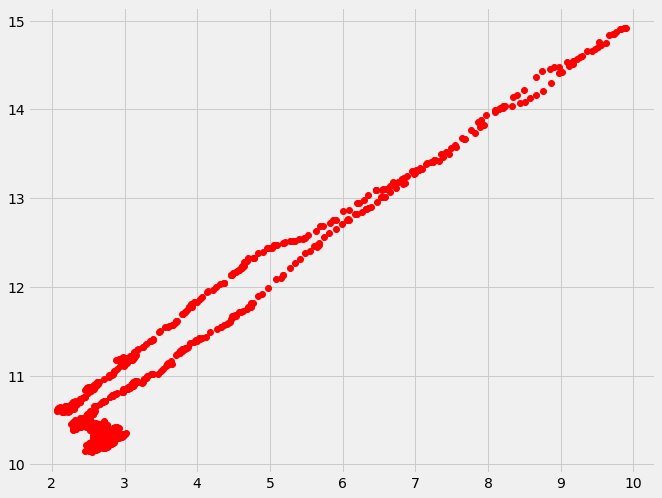

In [45]:
plt.figure(figsize = (10,8))

eps = 0.01
stohastic_gd(A,Y)
W_stoh = stohastic_gd(A,Y)

In [46]:
W_stoh

array([ 2.380343, 10.702234], dtype=float32)

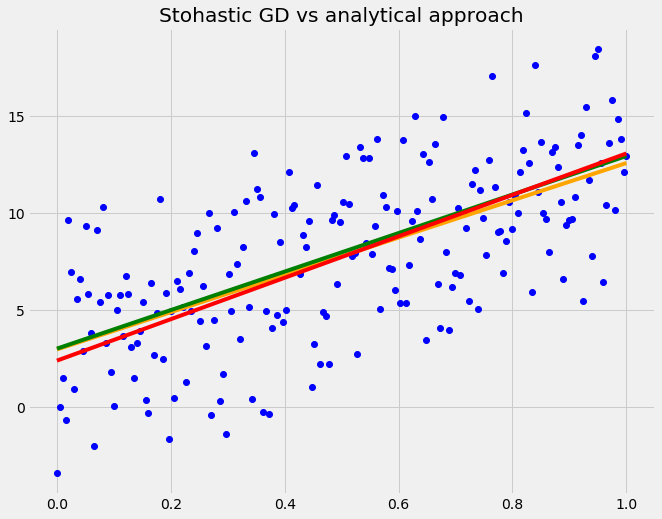

In [47]:
plt.figure(figsize = (10,8))


Y_sgd = A.dot(W_stoh)

plt.plot(X,Y, 'bo')
plt.plot(X,Y_pred, 'orange')
plt.plot(X,Y_func, 'g')
plt.plot(X,Y_sgd, 'r')
plt.title('Stohastic GD vs analytical approach');